In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [55]:
df_main = pd.read_csv('algerian-forest-fire-dataset.csv', header=1)
df_main.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [56]:
df_main.shape

(247, 14)

In [57]:
df_main.isnull().sum()

day            1
month          2
year           2
Temperature    2
 RH            2
 Ws            2
Rain           2
FFMC           2
DMC            2
DC             2
ISI            2
BUI            2
FWI            2
Classes        3
dtype: int64

In [58]:
df_main[df_main.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
168,14,7,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


### Add new Column with region as we have two Header columns with Region name have datset specific to these regions
#### 1. Bejaia Region (Till 122 row)
#### 2. Sidi_bel Abbes Region (After 122 row)

In [59]:
df_main.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [60]:
df = df_main
df.loc[:122,"Region"]=0
df.loc[122:,"Region"]=1

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          246 non-null    object 
 1   month        245 non-null    object 
 2   year         245 non-null    object 
 3   Temperature  245 non-null    object 
 4    RH          245 non-null    object 
 5    Ws          245 non-null    object 
 6   Rain         245 non-null    object 
 7   FFMC         245 non-null    object 
 8   DMC          245 non-null    object 
 9   DC           245 non-null    object 
 10  ISI          245 non-null    object 
 11  BUI          245 non-null    object 
 12  FWI          245 non-null    object 
 13  Classes      244 non-null    object 
 14  Region       247 non-null    float64
dtypes: float64(1), object(14)
memory usage: 29.1+ KB


In [62]:
df['Region']

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
242    1.0
243    1.0
244    1.0
245    1.0
246    1.0
Name: Region, Length: 247, dtype: float64

In [63]:
df[['Region']] = df[['Region']].astype(int)

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
 14  Region       247 non-null    int64 
dtypes: int64(1), object(14)
memory usage: 29.1+ KB


#### Remove the null values

In [65]:
# We can remove the null rows becuase one row is blank, one row is with Region header and one row has a nul value
# which we can drop , not makes much difference
df = df.dropna().reset_index(drop=True)
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

### The row 122 has the 2nd Region's Header column name , which we need to remove

In [66]:
df.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,1


In [67]:
df = df.drop(122).reset_index(drop=True)

In [68]:
#lets cross check row 122
df.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,1,6,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,1


### Check for blank spaces in column names

In [69]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

In [70]:
df.columns = df.columns.str.strip()

### Change all features to number datatype i.e int and float (features with float datatype)

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          243 non-null    object
 1   month        243 non-null    object
 2   year         243 non-null    object
 3   Temperature  243 non-null    object
 4   RH           243 non-null    object
 5   Ws           243 non-null    object
 6   Rain         243 non-null    object
 7   FFMC         243 non-null    object
 8   DMC          243 non-null    object
 9   DC           243 non-null    object
 10  ISI          243 non-null    object
 11  BUI          243 non-null    object
 12  FWI          243 non-null    object
 13  Classes      243 non-null    object
 14  Region       243 non-null    int64 
dtypes: int64(1), object(14)
memory usage: 28.6+ KB


In [72]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0


In [73]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [74]:
# change to int data type 
df[['day', 'month', 'year', 'Temperature', 'RH', 'Ws']] = df[['day', 'month', 'year', 'Temperature', 'RH', 'Ws']].astype(int)

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          243 non-null    int64 
 1   month        243 non-null    int64 
 2   year         243 non-null    int64 
 3   Temperature  243 non-null    int64 
 4   RH           243 non-null    int64 
 5   Ws           243 non-null    int64 
 6   Rain         243 non-null    object
 7   FFMC         243 non-null    object
 8   DMC          243 non-null    object
 9   DC           243 non-null    object
 10  ISI          243 non-null    object
 11  BUI          243 non-null    object
 12  FWI          243 non-null    object
 13  Classes      243 non-null    object
 14  Region       243 non-null    int64 
dtypes: int64(7), object(8)
memory usage: 28.6+ KB


## Change features to float datatype
#### Remaining features are now objects except classes feature which we change to float type

In [76]:
objects_columns = [features for features in df.columns if df[features].dtypes=='O']
objects_columns

['Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes']

In [77]:
for column in objects_columns:
    if column != 'Classes':
        df[column] = df[column].astype(float)

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.6+ KB


In [79]:
df.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
count,243.000000,243.000000,243.0,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,15.761317,7.502058,2012.0,32.152263,62.041152,15.493827,0.762963,77.842387,14.680658,49.430864,4.742387,16.690535,7.035391,0.497942
std,8.842552,1.114793,0.0,3.628039,14.828160,2.811385,2.003207,14.349641,12.393040,47.665606,4.154234,14.228421,7.440568,0.501028
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000
25%,8.000000,7.000000,2012.0,30.000000,52.500000,14.000000,0.000000,71.850000,5.800000,12.350000,1.400000,6.000000,0.700000,0.000000
50%,16.000000,8.000000,2012.0,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,33.100000,3.500000,12.400000,4.200000,0.000000
75%,23.000000,8.000000,2012.0,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,69.100000,7.250000,22.650000,11.450000,1.000000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000


## Encoding of the Categories in Classes

In [80]:
df['Classes'] = np.where(df['Classes'].str.contains('not fire'),0,1)

In [81]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [82]:
df.tail()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
238,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1
239,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,1
240,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1
241,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1
242,30,9,2012,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,0,1


# EDA (Exploratory Data Analysis)

### Plot - Density plot for each features

In [83]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'petroff10', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


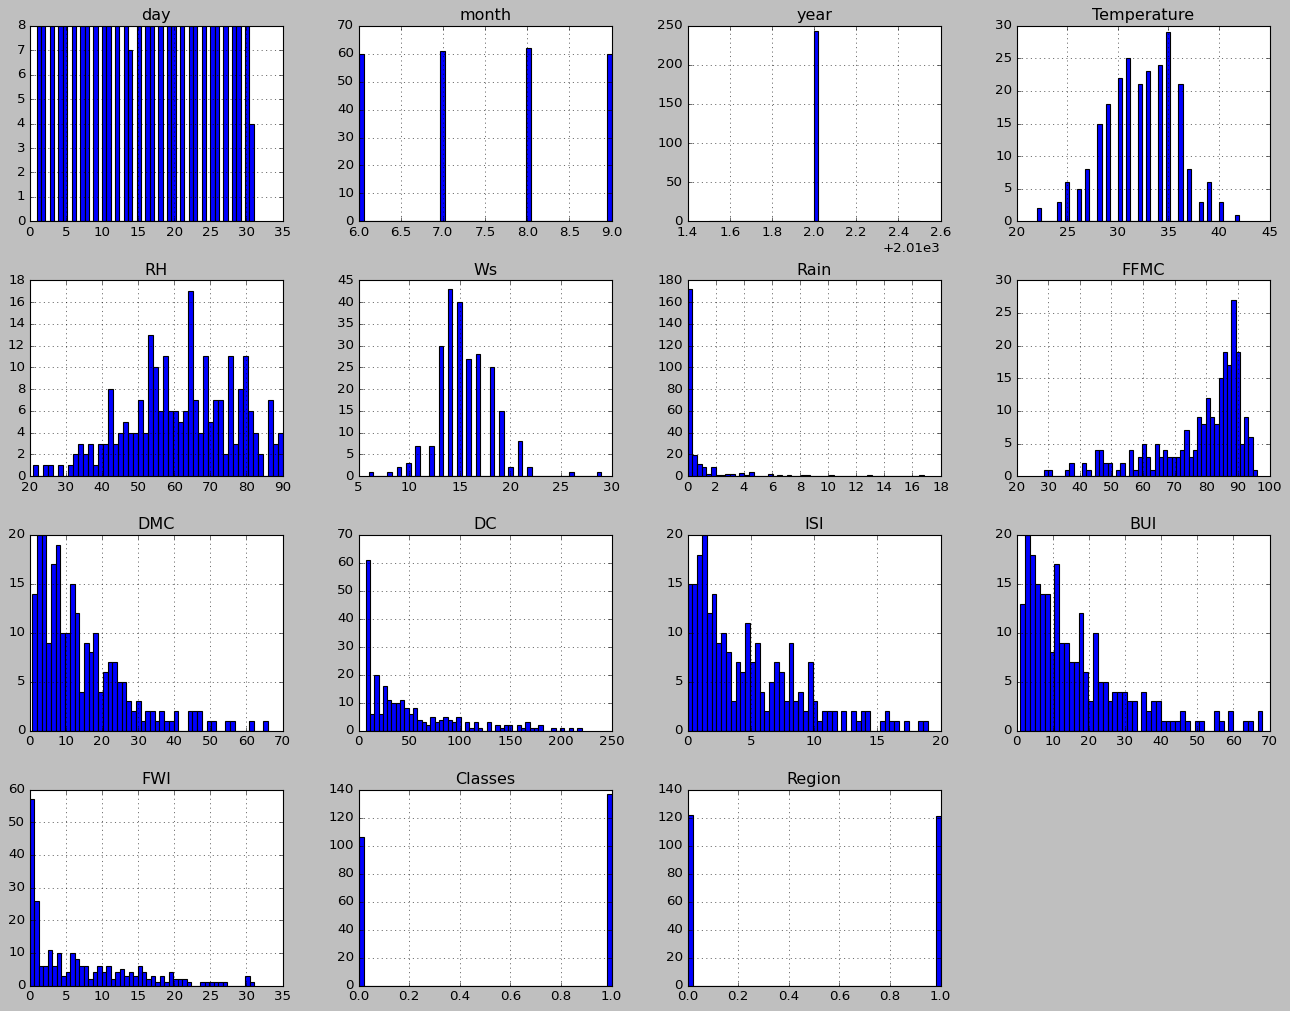

In [84]:
plt.style.use('classic')
df.hist(bins=50, figsize=(20, 15))
plt.show()

#### So we can check above which features are skewed and having normal distribution. Like Temprature feature is having bit of normal distribution.

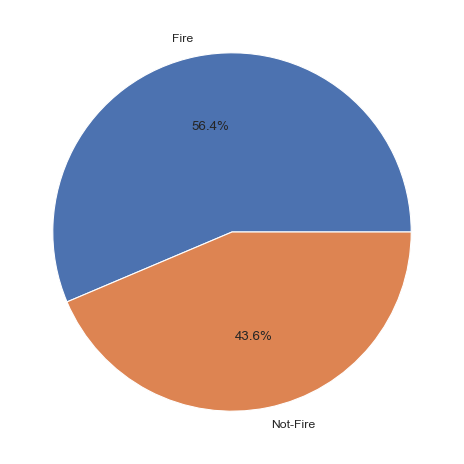

In [105]:
# Plotting piechart
percentage = df['Classes'].value_counts(normalize=True)*100

classleables = ["Fire","Not-Fire"]
plt.figure(figsize=(12,7))
plt.pie(percentage, labels=classleables, autopct='%1.1f%%')
plt.show()

## Correlation and Multicolleniarity

In [86]:
df.corr()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
day,1.000000,-0.000369,NaN,0.097227,-0.076034,0.047812,-0.112523,0.224956,0.491514,0.527952,0.180543,0.517117,0.350781,0.202840,0.000821
month,-0.000369,1.000000,NaN,-0.056781,-0.041252,-0.039880,0.034822,0.017030,0.067943,0.126511,0.065608,0.085073,0.082639,0.024004,0.001857
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Temperature,0.097227,-0.056781,NaN,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670,0.516015,0.269555
RH,-0.076034,-0.041252,NaN,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957,-0.432161,-0.402682
Ws,0.047812,-0.039880,NaN,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368,-0.069964,-0.181160
Rain,-0.112523,0.034822,NaN,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422,-0.379097,-0.040013
FFMC,0.224956,0.017030,NaN,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,0.769492,0.222241
DMC,0.491514,0.067943,NaN,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,0.585658,0.192089
DC,0.527952,0.126511,NaN,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,0.511123,-0.078734


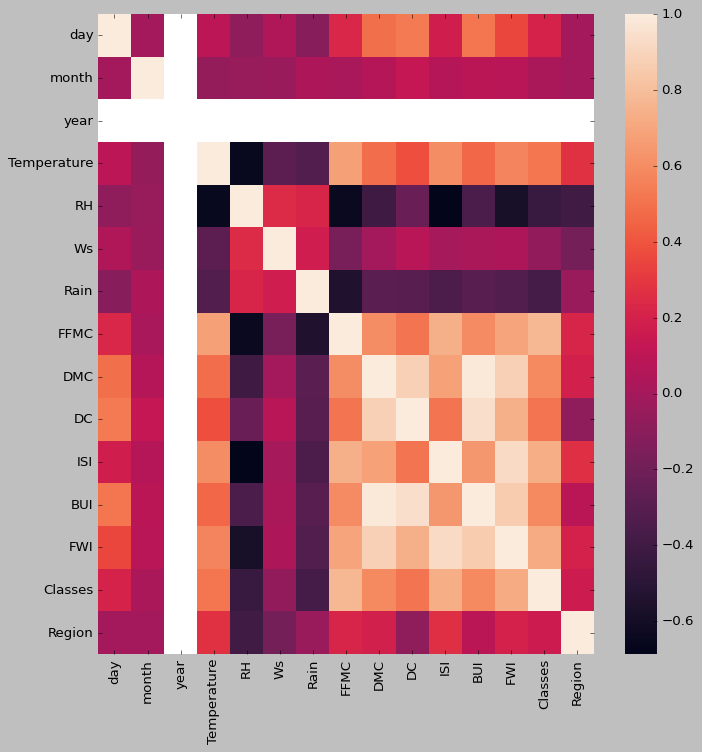

In [87]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr())
plt.show()

In [88]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [89]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


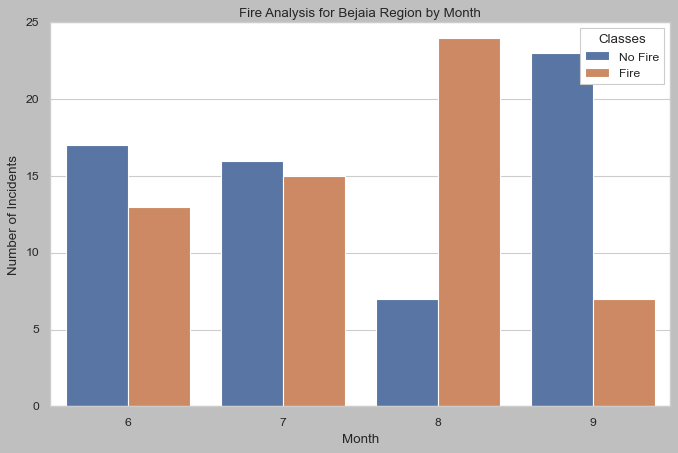

In [90]:
# Filter the data for Region 0
df_region_0 = df[df['Region'] == 0]

# Plot
plt.figure(figsize=(10, 6))
sns.set_theme(style="whitegrid")  # Modern replacement for older `set_style`
sns.countplot(x='month', hue='Classes', data=df_region_0)

# Customization
plt.title("Fire Analysis for Bejaia Region by Month")
plt.xlabel("Month")
plt.ylabel("Number of Incidents")
plt.legend(title="Classes", labels=["No Fire", "Fire"])
plt.show()

# Model Training (Ridge / Lasso / Elastic Net)

### From the correaltion we can see the day is highly correlated and month is negatively correlated and Year is not correlated so we can remove these columns.

In [91]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [92]:
#Lets drop day month and year since these are not related to output feature
df.drop(columns=['day', 'month', 'year'], axis=1, inplace=True)

In [93]:
df.columns

Index(['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI',
       'FWI', 'Classes', 'Region'],
      dtype='object')

## Create Dependent And Independent Features
#### FWI is my dependent feature so we will have Independent feature excluding FWI

In [94]:
X= df.drop('FWI', axis=1)
Y= df['FWI']

In [95]:
X.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0


In [96]:
Y.head()

0    0.5
1    0.4
2    0.1
3    0.0
4    0.5
Name: FWI, dtype: float64

#### Train Test Split

In [97]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.25, random_state=42)

In [98]:
X_train.shape, X_test.shape

((182, 11), (61, 11))

## Feature Slection based on Correlation

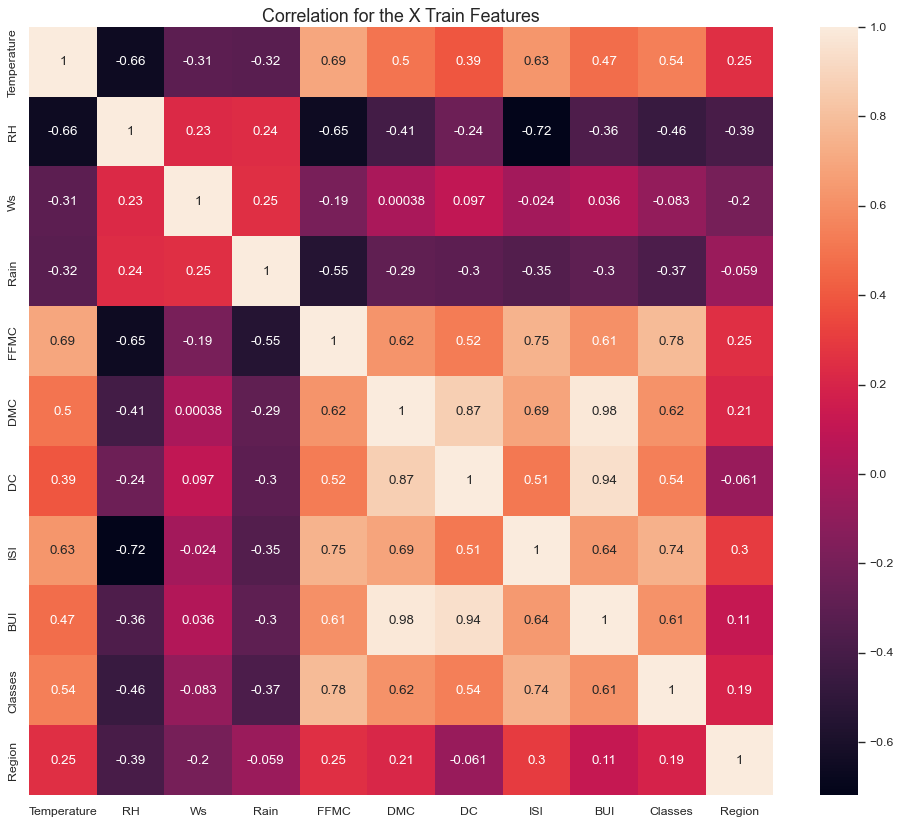

In [99]:
# check for multicollinearity
plt.figure(figsize=(15,12))
corr=X_train.corr()
sns.heatmap(corr, annot=True)
plt.title("Correlation for the X Train Features", fontsize=16, fontweight=50)
plt.show()

In [100]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [101]:
correlation(X_train, 0.85)

{'BUI', 'DC'}

#### Drop features when correlation is more than 0.85

In [102]:
# get the features to be dropped
corr_features = correlation(X_train, 0.85)
corr_features

{'BUI', 'DC'}

In [103]:
#drop features when correlation is more than threshold (0.85)
X_train.drop(corr_features, axis=1, inplace=True)
X_test.drop(corr_features, axis=1, inplace=True)
X_train.shape, X_test.shape

((182, 9), (61, 9))

### Feature Scaling or Standardization
#### Why fit_transform on X_train and transfor on X_test

#### - **`fit_transform`**: Computes the scaling parameters (mean = 0, std = 1) from the **training data** and applies these to scale the training dataset. This process normalize the data to a standard normal distribution.

#### - **`transform`**: Uses the **already computed scaling parameters** from the training data to scale the test data. It ensures the test data aligns with the same distribution as the training data, without recalculating or exposing the model to test data statistics.

#### - **Why only `transform` on test data?**
  #### - The test data is unseen, and we aim to maintain its purpose for evaluating the model's generalization ability.
  #### - By not "fitting" the test data, we prevent leakage of information from test to train while ensuring consistency in feature scaling.

In [113]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [123]:
X_train_scaled[:5]

array([[-0.84284248,  0.78307967,  1.29972026, -0.33727373, -0.12805583,
        -0.88272888, -0.62963326, -1.10431526, -0.98907071],
       [-0.30175842,  0.64950844, -0.59874754, -0.29048728, -1.21758569,
        -0.86687565, -0.93058524, -1.10431526,  1.01105006],
       [ 2.13311985, -2.08870172, -0.21905398, -0.38406017,  1.15703067,
         0.61540157,  2.7271388 ,  0.90553851,  1.01105006],
       [-0.03121639, -0.15191892,  0.9200267 , -0.24370083, -0.03726168,
        -0.27237944, -0.60648311, -1.10431526, -0.98907071],
       [-0.03121639, -1.0201319 , -0.59874754, -0.05655505, -0.00932501,
        -0.60529731, -0.69908371, -1.10431526, -0.98907071]])

In [124]:
X_test_scaled[:5]

array([[-0.30175842,  0.11522353, -0.21905398, -0.38406017,  0.63321824,
        -0.04250757,  0.20377222,  0.90553851, -0.98907071],
       [ 0.23932564, -0.55263261, -0.9784411 , -0.38406017,  0.73798073,
        -0.38335206,  0.36582328,  0.90553851, -0.98907071],
       [-1.11338451, -0.28549015,  0.9200267 ,  0.64524166, -0.97313989,
        -0.91443534, -0.83798463, -1.10431526,  1.01105006],
       [ 0.50986767, -0.28549015, -0.9784411 , -0.29048728,  0.1303583 ,
         0.31419016, -0.62963326, -1.10431526,  1.01105006],
       [-0.57230045,  0.18200914, -0.59874754, -0.38406017,  0.54242408,
         0.10017152, -0.07402961,  0.90553851,  1.01105006]])

### Box plot for Before and after applying Standardization scaling of X_train data

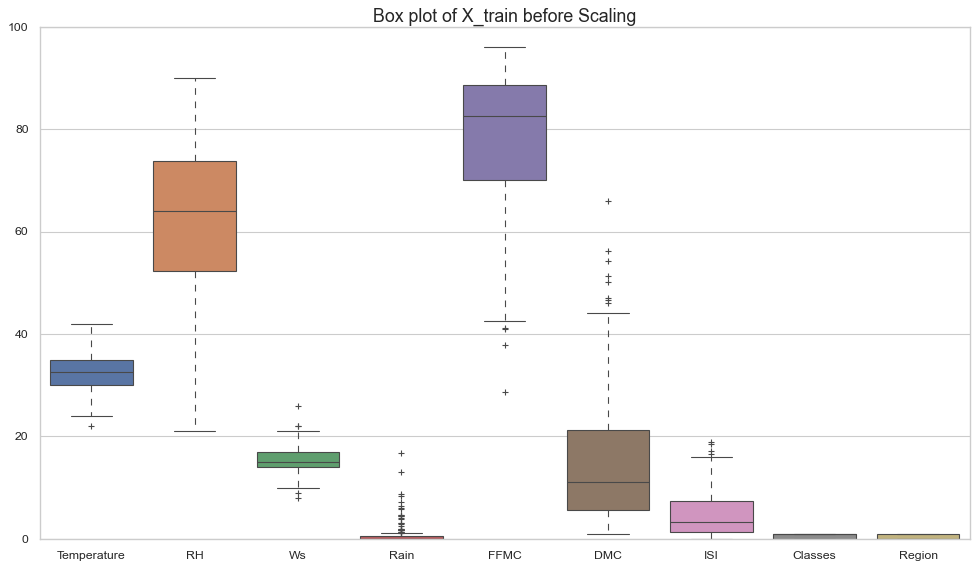

In [125]:
plt.figure(figsize=(15,8))
sns.boxplot(X_train)
plt.title("Box plot of X_train before Scaling", fontsize=16)
plt.show()

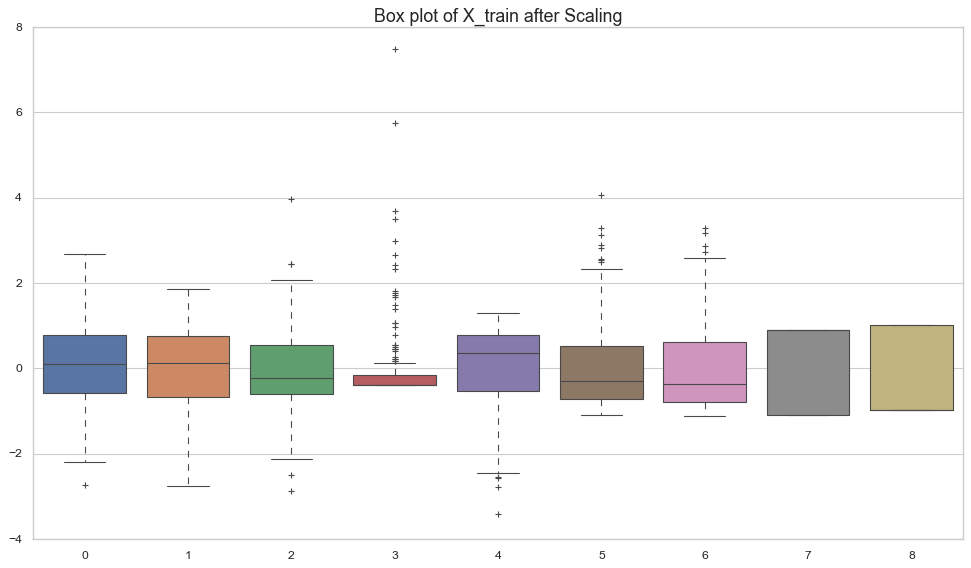

In [120]:
plt.figure(figsize=(15,8))
sns.boxplot(X_train_scaled)
plt.title("Box plot of X_train after Scaling", fontsize=16)
plt.show()

### **Imp - Check for VIF - (Variance Influence Factor)**

## Linear Regression Model

In [131]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

In [137]:
linreg = LinearRegression()
linreg.fit(X_train_scaled, Y_train)
y_pred = linreg.predict(X_test_scaled)
mae = mean_absolute_error(Y_test, y_pred)
score = r2_score(Y_test, y_pred)
print("Mean Squared Error", mae)
print("R2 Score", score)

Mean Squared Error 0.5468236465249978
R2 Score 0.9847657384266951


#### Here we can see that the R2 Score is 0.98 which is very good, but we know linear regression has the chances being Overfitting so we will use Lasso and Ridge and Elastic net Regression
#### If Lasso and Ridge, Elastic net gives the R2 Score less than linear regression that does not mean that its not good model but it has reduced overfitting.

## Lasso Regression

In [139]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error, r2_score

In [161]:
lasso = Lasso()
lasso.fit(X_train_scaled, Y_train)
y_pred = lasso.predict(X_test_scaled)
mae = mean_absolute_error(Y_test, y_pred)
score = r2_score(Y_test, y_pred)
print("Mean Absolute Error", mae)
print("R2 Score", score)

Mean Absolute Error 1.133175994914409
R2 Score 0.9492020263112388


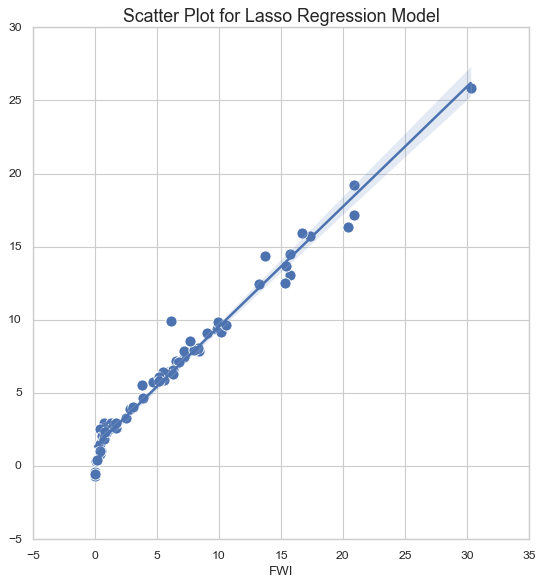

In [165]:
plt.figure(figsize=(8,8))
plt.title("Scatter Plot for Lasso Regression Model", fontsize=16)
sns.scatterplot(x=Y_test, y=y_pred, s=100)
sns.regplot(x=Y_test, y=y_pred)
plt.show()

## Ridge Regression Model

In [159]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, r2_score

In [160]:
ridge = Ridge()
ridge.fit(X_train_scaled, Y_train)
y_pred = ridge.predict(X_test_scaled)
mae = mean_absolute_error(Y_test, y_pred)
score = r2_score(Y_test, y_pred)
print("Mean Squared Error", mae)
print("R2 Score", score)

Mean Squared Error 0.5642305340105686
R2 Score 0.9842993364555513


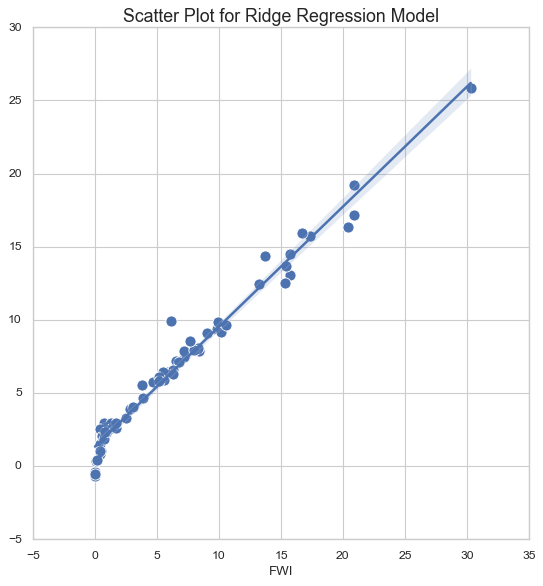

In [169]:
plt.figure(figsize=(8,8))
plt.title("Scatter Plot for Ridge Regression Model", fontsize=16)
sns.scatterplot(x=Y_test, y=y_pred, s=100)
sns.regplot(x=Y_test, y=y_pred)
plt.show()

## ElasticNet Regression
#### Note we have not used CV(Cross Validation), L1 and L2 Hyperparamters here so the error is high.

In [171]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error, r2_score

In [172]:
elastic_net = ElasticNet()
elastic_net.fit(X_train_scaled, Y_train)
y_pred = elastic_net.predict(X_test_scaled)
mae = mean_absolute_error(Y_test, y_pred)
score = r2_score(Y_test, y_pred)
print("Mean Squared Error", mae)
print("R2 Score", score)

Mean Squared Error 1.8822353634896
R2 Score 0.8753460589519703


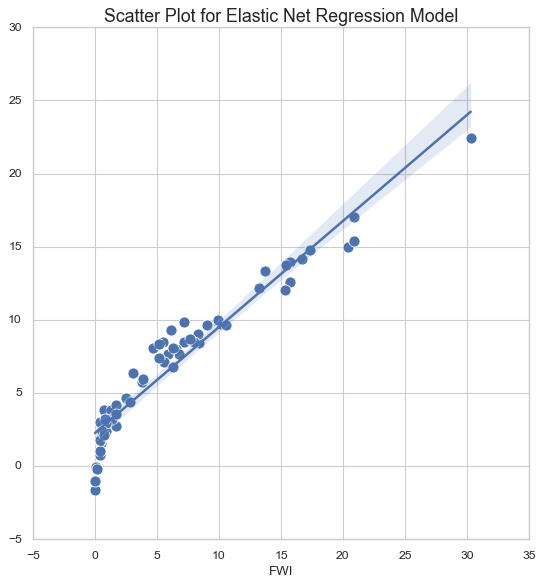

In [173]:
plt.figure(figsize=(8,8))
plt.title("Scatter Plot for Elastic Net Regression Model", fontsize=16)
sns.scatterplot(x=Y_test, y=y_pred, s=100)
sns.regplot(x=Y_test, y=y_pred)
plt.show()

## Lasso CV (Cross Validation)

In [180]:
from sklearn.linear_model import LassoCV
lasso_cv = LassoCV(cv=5)
lasso_cv.fit(X_train_scaled, Y_train)
y_pred = lasso_cv.predict(X_test_scaled)
mae = mean_absolute_error(Y_test, y_pred)
score = r2_score(Y_test, y_pred)
print("Mean Squared Error", mae)
print("R2 Score", score)

Mean Squared Error 0.6199701158263434
R2 Score 0.9820946715928275


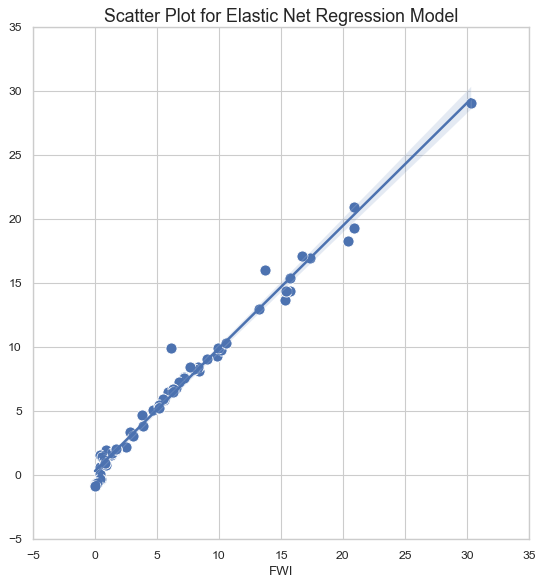

In [182]:
plt.figure(figsize=(8,8))
plt.title("Scatter Plot for Elastic Net Regression Model", fontsize=16)
sns.scatterplot(x=Y_test, y=y_pred, s=100)
sns.regplot(x=Y_test, y=y_pred)
plt.show()

### What happens in `LassoCV`?
1. **Cross-validation for alpha**:  
   The `LassoCV` class performs **cross-validation** to automatically find the best value for alpha (regularization strength).  
   During the fitting process:
   - It tries multiple values of alpha (by default, it tests values on a logarithmic scale) and evaluates the model's performance (Mean Squared Error by default) for each one across the specified folds of cross-validation.
   - After trying all the candidate values, it selects the **optimal alpha** that minimizes the cross-validated error.

2. **Fitting the model**:  
   Once the best alpha is determined, `LassoCV` fits the final model using that alpha.

### Accessing the selected alpha
If you want to know the alpha value that `LassoCV` selected, you can access it using the `.alpha_` attribute of the fitted model:

```python
print("Best alpha:", lasso_cv.alpha_)
```

This will display the value of alpha that gave the best performance during cross-validation.

---

### Why this approach is helpful
1. **Eliminates manual tuning**: You don’t need to guess the alpha value.
2. **Optimized regularization**: The model ensures that the regularization strength is neither too weak (leading to overfitting) nor too strong (leading to underfitting).
3. **Efficient and reliable**: Cross-validation helps provide a more robust selection of alpha.

In [183]:
# Once the best alpha is determined, LassoCV fits the final model using that alpha.
# the alpha value that LassoCV selected
lasso_cv.alpha_

np.float64(0.05725391318234408)

### What does `lasso_cv.coef_` represent?
1. **Feature coefficients after training**:  
   - Once `LassoCV` determines the best alpha value via cross-validation, it fits the model using that alpha.  
   - `lasso_cv.coef_` contains the coefficients (weights) of the features in the final fitted model.

2. **Impact of regularization**:  
   - Lasso regression applies \( L1 \)-regularization, which can shrink some coefficients to **exactly zero**.  
   - Coefficients being zero means the corresponding features are excluded from the model, helping with feature selection and improving interpretability.

3. **Practical significance**:  
   - Features with larger (absolute) coefficients are more important in the model.  
   - Features with coefficients of 0 have been deemed unnecessary by the model.

In [186]:
# lasso_cv.coef_ contains the coefficients (weights) of the features in the final fitted model.
# Coefficients being zero means the corresponding features are excluded from the model, helping with feature selection and improving interpretability.
lasso_cv.coef_

array([-0.        , -0.        ,  0.        ,  0.        , -0.40063928,
        3.60177292,  4.7999393 ,  0.16408964, -0.3022766 ])

### What does `lasso_cv.mse_path_` represent?
1. **Cross-validation error path**:  
   - During the cross-validation process, `LassoCV` evaluates the Mean Squared Error (MSE) for each candidate alpha value across all the folds.  
   - `lasso_cv.mse_path_` stores the **MSE values** for each fold and for each tested alpha.

2. **Details stored in `mse_path_`**:  
   - The shape of the array is `(n_alphas, n_folds)`, where:
     - `n_alphas` is the number of alpha values tried.
     - `n_folds` is the number of cross-validation folds.

- **`lasso_cv.mse_path_`** gives you insight into how the model's mean squared error changes for different alpha values during cross-validation, helping you diagnose the regularization process.

In [1]:
# During the cross-validation process, LassoCV evaluates the Mean Squared Error (MSE) for each candidate alpha value across all the folds.
# lasso_cv.mse_path_ stores the MSE values for each fold and for each tested alpha.
lasso_cv.mse_path_[:5]

NameError: name 'lasso_cv' is not defined

## Ridge CV

In [188]:
from sklearn.linear_model import RidgeCV
ridge_cv = RidgeCV(cv=5)
ridge_cv.fit(X_train_scaled, Y_train)
y_pred = ridge_cv.predict(X_test_scaled)
mae = mean_absolute_error(Y_test, y_pred)
score = r2_score(Y_test, y_pred)
print("Mean Squared Error", mae)
print("R2 Score", score)

Mean Squared Error 0.5642305340105686
R2 Score 0.9842993364555513


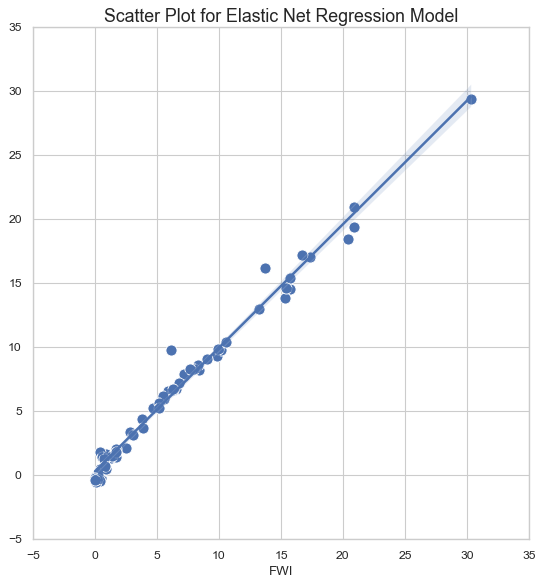

In [189]:
plt.figure(figsize=(8,8))
plt.title("Scatter Plot for Elastic Net Regression Model", fontsize=16)
sns.scatterplot(x=Y_test, y=y_pred, s=100)
sns.regplot(x=Y_test, y=y_pred)
plt.show()

In [192]:
ridge_cv.alphas

(0.1, 1.0, 10.0)

In [193]:
# out of the 3 alphas it selected the 1.0
ridge_cv.alpha_

np.float64(1.0)

In [191]:
ridge_cv.coef_

array([-0.02692577, -0.20519212,  0.02554428, -0.04069202, -0.78583006,
        3.68286744,  4.74488835,  0.43423672, -0.38466214])

## ElasticNet CV

In [206]:
from sklearn.linear_model import ElasticNetCV
elastic_cv = ElasticNetCV(cv=5)
elastic_cv.fit(X_train_scaled, Y_train)
y_pred = elastic_cv.predict(X_test_scaled)
mae = mean_absolute_error(Y_test, y_pred)
score = r2_score(Y_test, y_pred)
print("Mean Absolute Error", mae)
print("R2 Score", score)

Mean Absolute Error 0.6575946731430903
R2 Score 0.9814217587854941


#### In ElasticNet, the model combines **L1 (Lasso)** and **L2 (Ridge)** regularization, controlled by the parameter **`l1_ratio`**. The **`l1_ratio`** determines the percentage of L1 and L2 norms used in the regularization.

- If **`l1_ratio = 0`**, the model behaves like Ridge Regression (100% L2).
- If **`l1_ratio = 1`**, the model behaves like Lasso Regression (100% L1).
- If **`0 < l1_ratio < 1`**, it blends L1 and L2 regularization. For example:
  - **`l1_ratio = 0.5`** means the regularization is an equal mix of L1 and L2 norms (50% each).

To determine the exact percentage of L1 and L2 used by your model, check the **`elastic_cv.l1_ratio_`** attribute after fitting the model:

```python
print("L1 Ratio:", elastic_cv.l1_ratio_)
```

This will tell you the proportion of L1 regularization, and the remaining proportion is L2. For example:
- If **`l1_ratio_ = 0.7`**, it means **70% L1** and **30% L2** are used in the ElasticNet regularization.

In [204]:
print("L1 Ratio:", elastic_cv.l1_ratio_)

L1 Ratio: 0.5


In [198]:
elastic_cv.alphas_

array([14.11706004, 13.16561744, 12.27829889, 11.45078264, 10.67903821,
        9.95930678,  9.28808283,  8.66209714,  8.07830078,  7.53385034,
        7.02609405,  6.55255882,  6.11093829,  5.6990815 ,  5.31498248,
        4.95677045,  4.62270071,  4.31114616,  4.02058933,  3.74961507,
        3.49690356,  3.26122397,  3.04142839,  2.83644629,  2.64527931,
        2.46699633,  2.30072904,  2.1456676 ,  2.00105679,  1.86619226,
        1.74041714,  1.62311885,  1.51372607,  1.411706  ,  1.31656174,
        1.22782989,  1.14507826,  1.06790382,  0.99593068,  0.92880828,
        0.86620971,  0.80783008,  0.75338503,  0.7026094 ,  0.65525588,
        0.61109383,  0.56990815,  0.53149825,  0.49567705,  0.46227007,
        0.43111462,  0.40205893,  0.37496151,  0.34969036,  0.3261224 ,
        0.30414284,  0.28364463,  0.26452793,  0.24669963,  0.2300729 ,
        0.21456676,  0.20010568,  0.18661923,  0.17404171,  0.16231189,
        0.15137261,  0.1411706 ,  0.13165617,  0.12278299,  0.11

In [199]:
elastic_cv.coef_

array([-0.        , -0.19081149,  0.05486916, -0.        , -0.50794865,
        3.59828374,  4.50431349,  0.41864659, -0.32815292])

In [200]:
elastic_cv.mse_path_

array([[53.99690233, 65.39074075, 54.89628985, 77.90299066, 43.34226941],
       [52.57580575, 64.62234745, 53.744793  , 77.60921421, 42.30310502],
       [51.11104709, 62.99703302, 52.17649022, 76.53887034, 41.00613837],
       [49.61037668, 61.26183674, 50.57039748, 74.67053859, 39.67994098],
       [48.07677137, 59.48562789, 48.86189586, 72.53190776, 38.32743244],
       [46.08919463, 57.21227804, 46.85067587, 69.99343362, 36.64273851],
       [43.93304229, 54.81307   , 44.65826477, 67.19431714, 34.65787048],
       [41.80546452, 52.43573064, 42.39238637, 64.39190172, 32.6541552 ],
       [39.71309973, 50.06862734, 40.16732063, 61.6188179 , 30.67748611],
       [37.63649808, 47.60730813, 37.96880498, 58.88319233, 28.76304656],
       [35.48905272, 45.2114555 , 35.74224936, 56.09403417, 26.91571606],
       [33.36370035, 42.89274496, 33.46771793, 53.24006353, 25.13971517],
       [31.29021796, 40.65450553, 31.2980323 , 50.46056554, 23.40823907],
       [29.31299261, 38.49931979, 29.2

# you **can control** the proportion of L1 and L2 regularization in ElasticNet by manually specifying the **`l1_ratio`** parameter when creating the model. 

### Controlling `l1_ratio`
- By default, if you use `ElasticNetCV`, the algorithm searches for the best value of **`l1_ratio`** using cross-validation.
- If you want to control it directly (instead of letting the model decide), you can use the **`ElasticNet`** class from `sklearn` and set **`l1_ratio`** to a specific value.

### Example:
If you want a specific balance of L1 and L2 regularization:
```python
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(l1_ratio=0.8, alpha=0.1)  # 80% L1, 20% L2
elastic_net.fit(X_train_scaled, Y_train)
y_pred = elastic_net.predict(X_test_scaled)
```

- **`l1_ratio=0.8`**: Means 80% L1 and 20% L2 regularization.
- **`alpha`**: Controls the overall strength of regularization (how much penalty to apply).

### In ElasticNetCV:
If you use `ElasticNetCV`, you can pass a range of **`l1_ratio`** values for cross-validation to select the best one:
```python
elastic_cv = ElasticNetCV(l1_ratio=[0.1, 0.5, 0.7, 1], cv=5)
elastic_cv.fit(X_train_scaled, Y_train)
print("Best L1 Ratio:", elastic_cv.l1_ratio_)
```
Here, the model will test different proportions of L1 and L2 norms (0.1, 0.5, 0.7, 1) and pick the best-performing one.

### Summary:
- You **can control `l1_ratio`** if you know the balance of L1 and L2 you want.
- If you’re unsure, let `ElasticNetCV` automatically find the best value through cross-validation.